In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import sys

sys.path.append("/Users/jlq293/Projects/Random Projects/MedStatViz/")
from MedStatURLGenerator import MedStatURLGenerator
from MedStatScraper import MedStatScraper

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import seaborn as sns

# Get atc codes


In [20]:
# load atc dictionary:
with open("N06A_MedStat_ATC_Dictionary.json") as f:
    atc_dict = json.load(f)

n06a_cats = [k for k in list(atc_dict["N06A"].keys()) if k.startswith("N06")]
n06a_all_drugs = [
    drug_code
    for cat in n06a_cats
    for drug_code in atc_dict["N06A"][cat].keys()
    if drug_code.startswith("N06")
]
print(n06a_cats)
print(n06a_all_drugs)

['N06AA', 'N06AB', 'N06AF', 'N06AG', 'N06AX']
['N06AA02', 'N06AA03', 'N06AA04', 'N06AA05', 'N06AA06', 'N06AA07', 'N06AA09', 'N06AA10', 'N06AA11', 'N06AA12', 'N06AA16', 'N06AA17', 'N06AA21', 'N06AB03', 'N06AB04', 'N06AB05', 'N06AB06', 'N06AB08', 'N06AB10', 'N06AF01', 'N06AG02', 'N06AX03', 'N06AX06', 'N06AX11', 'N06AX12', 'N06AX16', 'N06AX18', 'N06AX21', 'N06AX22', 'N06AX26', 'N06AX27']


# Initiate URLs


In [21]:
generator = MedStatURLGenerator()
generator.print_all_options()


AVAILABLE OPTIONS:

REGION:
  0: Denmark
  1: Capital Region
  2: Region Zealand
  3: Region of Southern Denmark
  4: Central Denmark Region
  5: North Denmark Region

SECTOR:
  0: Primary Sector
  1: Hospital Sector
  2: Total

GENDER:
  A: All
  1: Men
  2: Women

AGE_GROUP:
  A: All

SEARCH_VARIABLE:
  people_count: Number of users
  people_count_1000: Number of users per 1000 inhabitants
  sold_volume: Sold volume
  sold_volume_1000_day: Sold volume per 1,000 inhabitants per day

Note that non-primary sectors only support volume measurements and cannot filter by gender or age group
If you want to filter by gender or age group, set sector to '0' (Primary Sector)


In [22]:
years = [str(year) for year in range(2001, 2024)]

medstat_url_volume = generator.generate_url(
    n06a_cats,
    years=years,
    region="0",
    sector="0",
    gender="A",
    age_group="A",
    search_variable="sold_volume",
)

medstat_url_volume1000 = generator.generate_url(
    n06a_cats,
    years=years,
    region="0",
    sector="0",
    gender="A",
    age_group="A",
    search_variable="sold_volume_1000_day",
)


medstat_url_people = generator.generate_url(
    n06a_cats,
    years=years,
    region="0",
    sector="0",
    gender="A",
    age_group="A",
    search_variable="people_count",
)


medstat_url_people1000 = generator.generate_url(
    n06a_cats,
    years=years,
    region="0",
    sector="0",
    gender="A",
    age_group="A",
    search_variable="people_count_1000",
)

medstat_url_all_years_all_atc = generator.generate_url(
    n06a_all_drugs,
    years=[str(year) for year in range(1997, 2024)],
    region="0",
    sector="0",
    gender="A",
    age_group="A",
    search_variable="people_count",
)

print("\nURL ATC VOLUME:", medstat_url_volume)
print("\nURL ATC PEOPLE:", medstat_url_people)

print("\nURL ATC VOLUME1000:", medstat_url_volume1000)
print("\nURL ATC PEOPLE1000:", medstat_url_people1000)

print("\nURL ATC ALL YEARS ALL DRUGS:", medstat_url_all_years_all_atc)


URL ATC VOLUME: https://medstat.dk/en/viewDataTables/medicineAndMedicalGroups/%7B%22year%22%3A%20%5B%222001%22%2C%20%222002%22%2C%20%222003%22%2C%20%222004%22%2C%20%222005%22%2C%20%222006%22%2C%20%222007%22%2C%20%222008%22%2C%20%222009%22%2C%20%222010%22%2C%20%222011%22%2C%20%222012%22%2C%20%222013%22%2C%20%222014%22%2C%20%222015%22%2C%20%222016%22%2C%20%222017%22%2C%20%222018%22%2C%20%222019%22%2C%20%222020%22%2C%20%222021%22%2C%20%222022%22%2C%20%222023%22%5D%2C%20%22region%22%3A%20%5B%220%22%5D%2C%20%22gender%22%3A%20%5B%22A%22%5D%2C%20%22ageGroup%22%3A%20%5B%22A%22%5D%2C%20%22searchVariable%22%3A%20%5B%22sold_volume%22%5D%2C%20%22errorMessages%22%3A%20%5B%5D%2C%20%22atcCode%22%3A%20%5B%22N06AA%22%2C%20%22N06AB%22%2C%20%22N06AF%22%2C%20%22N06AG%22%2C%20%22N06AX%22%5D%2C%20%22sector%22%3A%20%5B%220%22%5D%7D

URL ATC PEOPLE: https://medstat.dk/en/viewDataTables/medicineAndMedicalGroups/%7B%22year%22%3A%20%5B%222001%22%2C%20%222002%22%2C%20%222003%22%2C%20%222004%22%2C%20%222005%22%2C

# Scrape Data


In [23]:
# Create an instance of the scraper
scraper = MedStatScraper(medstat_url_volume)

try:
    # Fetch the HTML content
    scraper.fetch_html()

    # Parse the statistical data table
    scraper.parse_table()

    # Format the parsed data into a DataFrame
    df = scraper.format_dataframe()

    # Display the resulting DataFrame

except Exception as e:
    print(f"An error occurred: {e}")

df

,ATC-code,Setting,Unit,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,N06AA (Non selective monoamine reuptake inhibi...,Total primary sector sales,DDD,8690,8440,8222,8340,8322,8332,8509,...,9063,8873,8615,8226,7997,7841,7740,7602.0,7483.0,7486.0
1,N06AB (Selective serotonin reuptake inhibitors),Total primary sector sales,DDD,54832,61908,71084,74371,80970,87427,94572,...,96445,97392,97255,96727,98475,101314,105163,111908.0,118437.0,126057.0
2,"N06AF (Monoamine oxidase inhibitors, non-selec...",Total primary sector sales,DDD,260,268,265,280,276,282,294,...,238,229,222,227,235,241,242,231.0,220.0,216.0
3,N06AG (Monoamine oxidase type a inhibitors),Total primary sector sales,DDD,178,166,150,140,124,111,103,...,65,52,50,44,42,37,19,NaN,NaN,NaN
4,N06AX (Other antidepressants),Total primary sector sales,DDD,15316,18313,21088,23529,26663,30185,33362,...,49560,50532,51135,51744,52986,54498,56479,58785.0,61275.0,63827.0


In [24]:
urls = [
    medstat_url_volume,
    medstat_url_volume1000,
    medstat_url_people,
    medstat_url_people1000,
    medstat_url_all_years_all_atc,
]
urls_strings = [
    "medstat_url_volume",
    "medstat_url_volume1000",
    "medstat_url_people",
    "medstat_url_people1000",
    "medstat_url_all_years_all_atc",
]
table_data_dict = {}
for i, url in enumerate(urls):
    # Create an instance of the scraper
    scraper = MedStatScraper(url)

    # Fetch the HTML content
    scraper.fetch_html()

    # Parse the statistical data table
    scraper.parse_table()

    # Format the parsed data into a DataFrame
    df = scraper.format_dataframe()
    table_data_dict[urls_strings[i]] = df

Removed years with no data: ['1997', '1998']


/Users/jlq293/Projects/Random Projects/MedStatViz/MedStatScraper.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(


In [25]:
table_data_dict["medstat_url_all_years_all_atc"]

,ATC-code,Setting,Unit,1999,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,N06AA02 (Imipramine),Prescription sales to individuals,Sales,5315.0,5390.0,5660.0,5485.0,5715.0,5785.0,5780.0,...,4855.0,4625.0,4300.0,4085.0,3745.0,3525.0,3170.0,2860.0,2235.0,NaN
1,N06AA03 (Imipramine oxide),Prescription sales to individuals,Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N06AA04 (Clomipramine),Prescription sales to individuals,Sales,7160.0,6685.0,6315.0,5810.0,5430.0,5120.0,4870.0,...,3380.0,3245.0,3030.0,2775.0,2645.0,2565.0,2425.0,2495.0,2540.0,2370.0
3,N06AA05 (Opipramol),Prescription sales to individuals,Sales,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N06AA06 (Trimipramine),Prescription sales to individuals,Sales,260.0,205.0,220.0,205.0,180.0,155.0,145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,N06AA07 (Lofepramine),Prescription sales to individuals,Sales,745.0,760.0,645.0,560.0,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,N06AA09 (Amitriptyline),Prescription sales to individuals,Sales,24645.0,25325.0,25985.0,25825.0,27090.0,27975.0,28820.0,...,35695.0,36090.0,35445.0,35020.0,34700.0,34465.0,34635.0,36080.0,37195.0,38050.0
7,N06AA10 (Nortriptyline),Prescription sales to individuals,Sales,9630.0,9655.0,9840.0,9675.0,10105.0,10745.0,11185.0,...,15930.0,15750.0,15300.0,14965.0,14370.0,13660.0,13005.0,12390.0,12605.0,12220.0
8,N06AA11 (Protriptyline),Prescription sales to individuals,Sales,15.0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,N06AA12 (Doxepin),Prescription sales to individuals,Sales,2905.0,2645.0,2360.0,2125.0,1940.0,1770.0,1510.0,...,690.0,600.0,525.0,485.0,450.0,405.0,235.0,NaN,NaN,NaN


# vizualize


In [26]:
# remove rows where max value is below 10000
df = table_data_dict["medstat_url_all_years_all_atc"]
year_cols = [col for col in df.columns if col.isdigit()]
df["max_value"] = df[year_cols].max(axis=1)
df["sum_value"] = df[year_cols].sum(axis=1)
df = df[df["max_value"] > 10000].reset_index(drop=True)
df.sort_values("sum_value", ascending=False, inplace=True)
df.head(11)

,ATC-code,Setting,Unit,1999,2000,2001,2002,2003,2004,2005,...,2016,2017,2018,2019,2020,2021,2022,2023,max_value,sum_value
3,N06AB04 (Citalopram),Prescription sales to individuals,Sales,85275.0,93755.0,113900.0,124175.0,139090.0,146985.0,154615.0,...,112600.0,100125.0,90715.0,82820.0,76935.0,73025.0,69045.0,65375.0,178240.0,3110000.0
5,N06AB06 (Sertraline),Prescription sales to individuals,Sales,36765.0,39490.0,43930.0,43480.0,41335.0,36975.0,35365.0,...,92400.0,100925.0,111150.0,120930.0,130125.0,144065.0,158010.0,171835.0,171835.0,1893295.0
8,N06AX11 (Mirtazapine),Prescription sales to individuals,Sales,24080.0,31270.0,40645.0,45845.0,47420.0,48260.0,52900.0,...,79790.0,82300.0,83835.0,84615.0,85240.0,87450.0,89095.0,91360.0,91360.0,1705460.0
10,N06AX16 (Venlafaxine),Prescription sales to individuals,Sales,13840.0,16675.0,21775.0,26485.0,31560.0,34120.0,36130.0,...,52150.0,50155.0,48560.0,47440.0,45695.0,45190.0,45280.0,45295.0,58960.0,1051935.0
0,N06AA09 (Amitriptyline),Prescription sales to individuals,Sales,24645.0,25325.0,25985.0,25825.0,27090.0,27975.0,28820.0,...,35445.0,35020.0,34700.0,34465.0,34635.0,36080.0,37195.0,38050.0,38050.0,808080.0
6,N06AB10 (Escitalopram),Prescription sales to individuals,Sales,NaN,NaN,NaN,6270.0,22910.0,26090.0,40270.0,...,25265.0,24020.0,23770.0,23745.0,24105.0,24930.0,26110.0,26640.0,71210.0,778460.0
11,N06AX21 (Duloxetine),Prescription sales to individuals,Sales,NaN,NaN,NaN,NaN,NaN,75.0,5925.0,...,25665.0,30500.0,34375.0,38385.0,42800.0,48375.0,54175.0,61325.0,61325.0,537785.0
4,N06AB05 (Paroxetine),Prescription sales to individuals,Sales,24155.0,25915.0,27285.0,27715.0,28205.0,24250.0,22240.0,...,13645.0,12935.0,12475.0,11770.0,11190.0,10990.0,10655.0,10340.0,28205.0,452705.0
7,N06AX03 (Mianserin),Prescription sales to individuals,Sales,15555.0,16875.0,17895.0,17885.0,19390.0,20765.0,21520.0,...,13635.0,12070.0,10360.0,8795.0,8755.0,8980.0,8830.0,8320.0,23465.0,419680.0
2,N06AB03 (Fluoxetine),Prescription sales to individuals,Sales,25015.0,23200.0,24285.0,25250.0,22915.0,20950.0,19725.0,...,11425.0,10815.0,10630.0,10300.0,9685.0,9310.0,9475.0,9855.0,25250.0,398760.0


In [27]:
from MedStatPlotter import MedStatPlotter

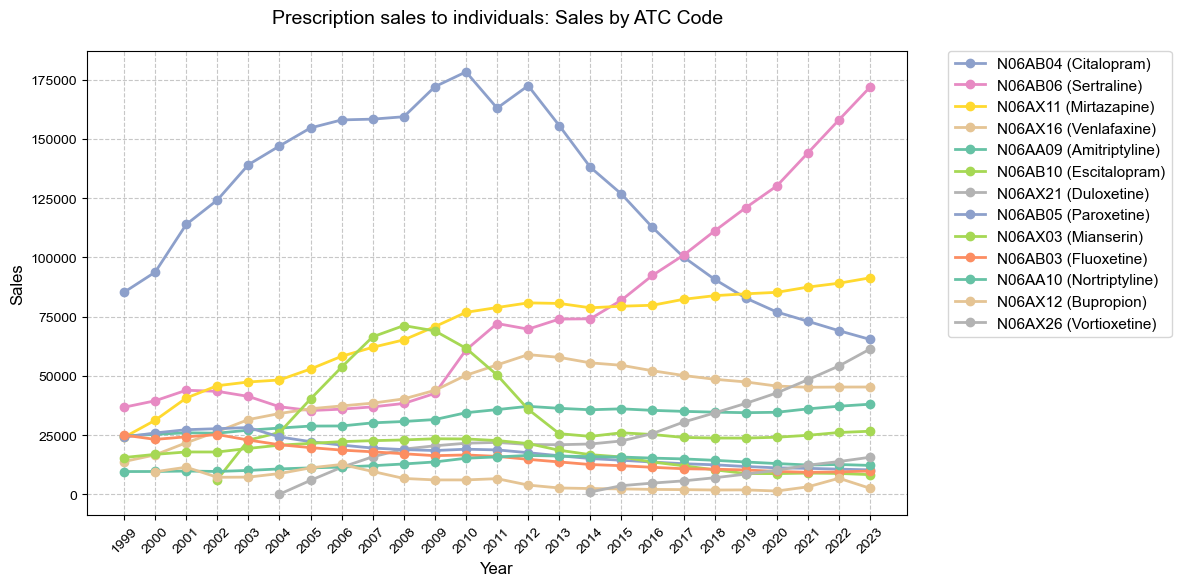

In [28]:
# Create an instance of DataPlotter
plotter = MedStatPlotter(df)

# Plot the data
plotter.plot()

# Save the plot
plotter.save_plot("output_plot.png")

# Show the plot
plotter.show_plot()

In [29]:
table_data_dict.keys()

dict_keys(['medstat_url_volume', 'medstat_url_volume1000', 'medstat_url_people', 'medstat_url_people1000', 'medstat_url_all_years_all_atc'])

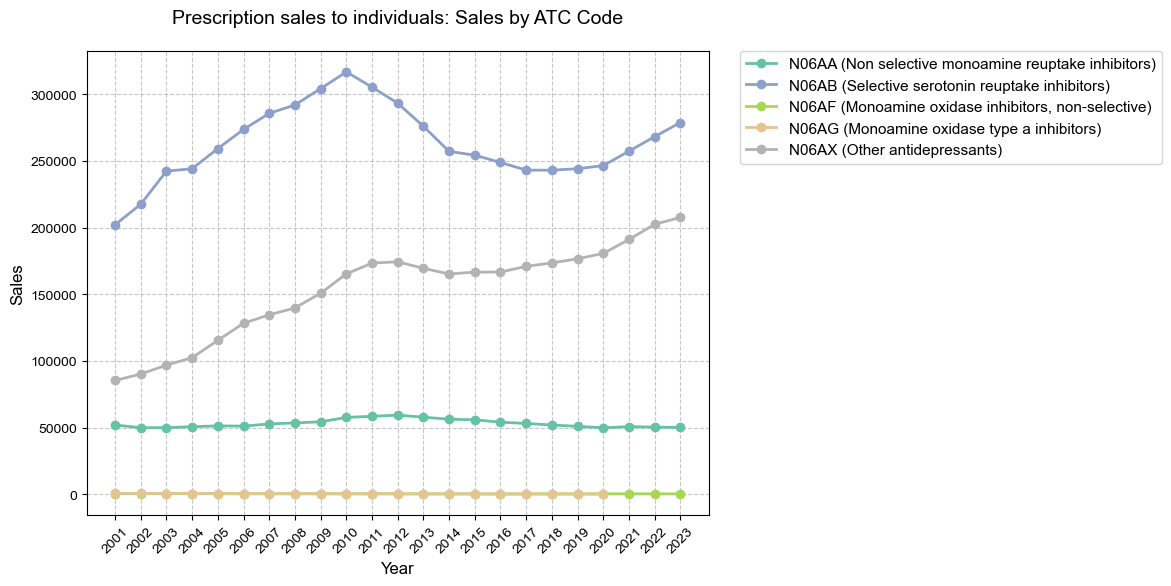

In [30]:
# Create an instance of DataPlotter
plotter = MedStatPlotter(table_data_dict["medstat_url_people"])

# Plot the data
plotter.plot()

# Save the plot
plotter.save_plot("output_plot2.png")

# Show the plot
plotter.show_plot()